In [462]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from scipy.stats import randint
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, StackingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from scipy.stats import boxcox
from scipy.special import boxcox1p
from scipy.stats import skew
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from copy import deepcopy
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [463]:
data = pd.read_csv('uk_universities.csv')


def percent_to_float(value):
    return float(value.strip('%')) / 100

data['Student_satisfaction'] = data['Student_satisfaction'].apply(percent_to_float)

In [465]:
data.shape

(131, 21)

In [441]:
from sklearn.ensemble import IsolationForest

def remove_outliers(data, columns, zscore_threshold=2):
    def find_iqr_outliers(data, column):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
        return outliers

    def find_zscore_outliers(data, column, threshold=2):
        z_scores = np.abs(stats.zscore(data[column]))
        outliers = z_scores > threshold
        return outliers


    def combine_outliers(outliers1, outliers2):
        combined_outliers = (outliers1.astype(int) + outliers2.astype(int) ) >= 1
        return combined_outliers

    combined_outliers = pd.DataFrame(False, index=data.index, columns=data.columns)

    for column in columns:
        iqr_outliers = find_iqr_outliers(data, column)
        zscore_outliers = find_zscore_outliers(data, column, zscore_threshold)
        combined_outliers[column] = combine_outliers(iqr_outliers, zscore_outliers)

    filtered_df = data[~combined_outliers.any(axis=1)]
    return filtered_df


 mu = 0.78 and sigma = 0.03



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


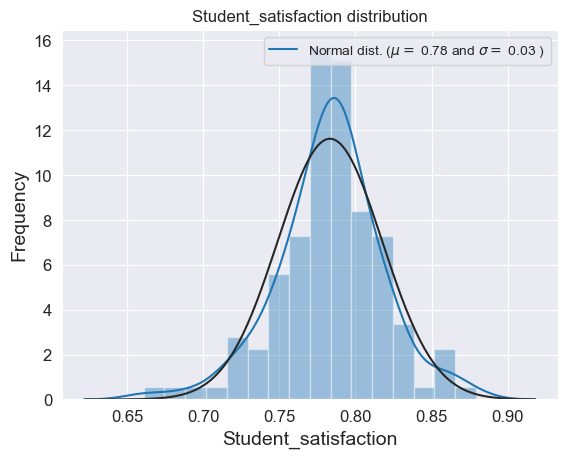

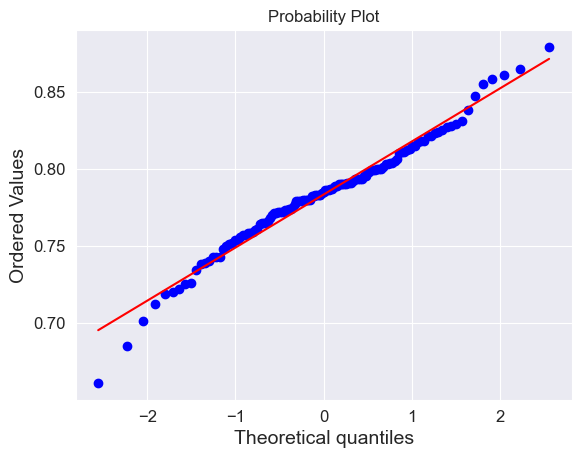

In [442]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot

fit = norm

sns.distplot(data['Student_satisfaction'], fit=fit)

(mu, sigma) = norm.fit(data['Student_satisfaction'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')
plt.ylabel('Frequency')
plt.title('Student_satisfaction distribution')

# Get also the QQ-plot
fig = plt.figure()
res = probplot(data['Student_satisfaction'], plot=plt)
plt.show()


 mu = 0.58 and sigma = 0.02



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


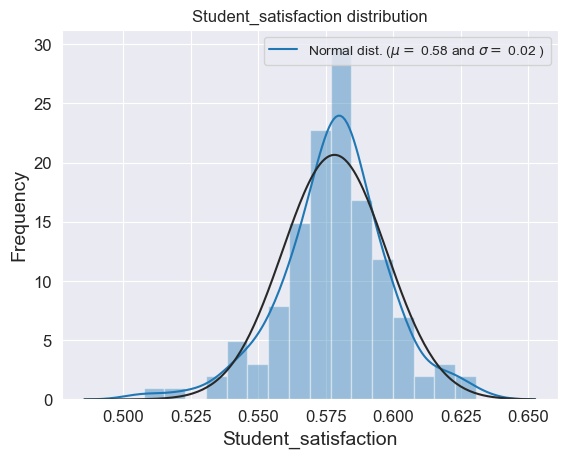

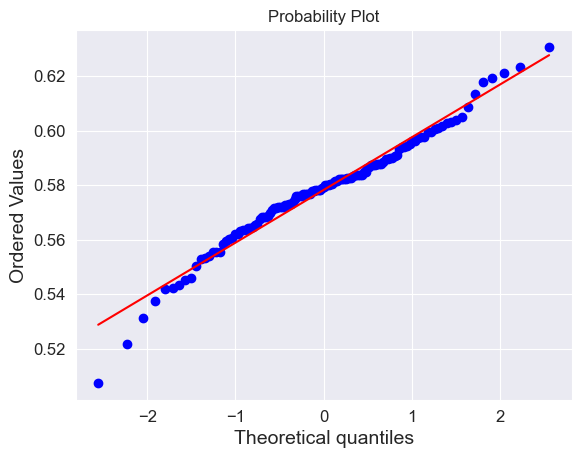

In [443]:
data['Student_satisfaction'] = np.log1p(data['Student_satisfaction'])

sns.distplot(data['Student_satisfaction'],fit=fit)
(mu , sigma) = norm.fit(data['Student_satisfaction'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')
plt.ylabel('Frequency')
plt.title('Student_satisfaction distribution')

# Get also the QQ-plot
fig = plt.figure()
res = probplot(data['Student_satisfaction'], plot=plt)
plt.show()

In [444]:
data.head(30)

,University_name,Region,Founded_year,Motto,UK_rank,World_rank,CWUR_score,Minimum_IELTS_score,UG_average_fees_(in_pounds),PG_average_fees_(in_pounds),...,Student_satisfaction,Student_enrollment,Academic_staff,Control_type,Academic_Calender,Campus_setting,Estimated_cost_of_living_per_year_(in_pounds),Latitude,Longitude,Website
0,University of Cambridge,East of England,1209,"From here, light and sacred draughts",1,4,94.1,6.5,21750,23187,...,0.617885,"20,000-24,999","over-5,000",Public,Trimesters,Urban,12000,52.2054,0.1132,www.cam.ac.uk
1,University of Oxford,South East England,1096,The Lord is my light,2,2,93.3,6.5,21770,19888,...,0.623261,"25,000-29,999","over-5,000",Public,Trimesters,Urban,11500,51.7548,-1.2544,www.ox.ac.uk
2,University of St Andrews,Scotland,1413,Ever to excel,3,86,75.8,6.5,17040,15440,...,0.630740,"10,000-14,999","1,000-1,499",Public,Semesters,Suburban,12000,56.3417,-2.7943,www.st-andrews.ac.uk
3,Imperial College London,London,1907,Knowledge is the adornment and safeguard of th...,4,8,86.6,6.5,23500,29900,...,0.576051,"15,000-19,999","4,000-4,499",Public,Continuous,Urban,10700,51.4988,-0.1749,www.ic.ac.uk
4,Loughborough University,East Midlands,1966,"With Truth, Knowledge and Labour",5,404,72.8,5.5,16400,16400,...,0.619501,"15,000-19,999","1,500-1,999",Public,Semesters,Suburban,9398,52.7650,-1.2321,www.lboro.ac.uk/
5,London School of Economics and Political Science,London,1895,To know the causes of things,6,23,76.3,6.5,17040,24500,...,0.521766,"10,000-14,999","1,500-1,999",Public,Semesters,Urban,12000,51.5144,-0.1165,www.lse.ac.uk
6,Durham University,North East England,1832,Her foundations are upon the holy hills,7,70,76.3,5.5,14900,18000,...,0.559616,"15,000-19,999","1,500-1,999",Public,Trimesters,Urban,8000,54.7650,-1.5782,www.dur.ac.uk
7,Lancaster University,North West England,1964,Truth lies open to all,8,130,76.1,5.5,14940,14200,...,0.583890,"10,000-14,999","2,000-2,499",Public,Trimesters,Rural,8500,54.0104,-2.7877,www.lancs.ac.uk
8,University College London,London,1826,Let all come who by merit most deserve reward,9,14,88.0,6.5,15660,17250,...,0.561899,"40,000-44,999","over-5,000",Public,Other,Urban,11500,51.5246,-0.1340,www.ucl.ac.uk
9,University of Warwick,West Midlands,1965,Mind Moves matter,10,80,79.3,5.5,15820,24500,...,0.583332,"25,000-29,999","2,500-2,999",Public,Trimesters,Suburban,9580,52.3793,-1.5615,www.warwick.ac.uk


In [445]:
data.info()
                   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   University_name                                131 non-null    object 
 1   Region                                         131 non-null    object 
 2   Founded_year                                   131 non-null    int64  
 3   Motto                                          114 non-null    object 
 4   UK_rank                                        131 non-null    int64  
 5   World_rank                                     131 non-null    int64  
 6   CWUR_score                                     84 non-null     float64
 7   Minimum_IELTS_score                            131 non-null    float64
 8   UG_average_fees_(in_pounds)                    131 non-null    int64  
 9   PG_average_fees_(in_pounds)                    131 non

In [446]:
data.isna().sum()

University_name                                   0
Region                                            0
Founded_year                                      0
Motto                                            17
UK_rank                                           0
World_rank                                        0
CWUR_score                                       47
Minimum_IELTS_score                               0
UG_average_fees_(in_pounds)                       0
PG_average_fees_(in_pounds)                       0
International_students                            0
Student_satisfaction                              0
Student_enrollment                                0
Academic_staff                                    0
Control_type                                      0
Academic_Calender                                26
Campus_setting                                   18
Estimated_cost_of_living_per_year_(in_pounds)     0
Latitude                                          0
Longitude   

# Feature Engineering and Solving Nans

In [447]:
data['Motto'].fillna('Unknown',inplace=True)

In [448]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

for z in ['Region','Control_type','Campus_setting','Student_satisfaction','Student_enrollment']:
    for i in ['Academic_Calender','Campus_setting']:
        
        
    

        data_clean = data.dropna(subset=[z, i])

        contingency_table = pd.crosstab(data_clean[z], data_clean[i])

        chi2, p_value, _, _ = chi2_contingency(contingency_table)

        print("Chi-Square Statistic:", chi2)
        print("P-Value:", p_value)

        alpha = 0.05

        if p_value < alpha:
            
            
        
            print("There is a significant association between" ,{z}, "and.",{i})
        else:
            
         
            print("There is no significant association between",{z}," and ",{i})

Chi-Square Statistic: 34.704509803921574
P-Value: 0.8409358563297149
There is no significant association between {'Region'}  and  {'Academic_Calender'}
Chi-Square Statistic: 30.698441230948973
P-Value: 0.10245322655559409
There is no significant association between {'Region'}  and  {'Campus_setting'}
Chi-Square Statistic: 0.40384615384615385
P-Value: 0.9821607978554505
There is no significant association between {'Control_type'}  and  {'Academic_Calender'}
Chi-Square Statistic: 3.369734908705497
P-Value: 0.1854690134372819
There is no significant association between {'Control_type'}  and  {'Campus_setting'}
Chi-Square Statistic: 14.210509031198686
P-Value: 0.07644091076132854
There is no significant association between {'Campus_setting'}  and  {'Academic_Calender'}
Chi-Square Statistic: 226.0
P-Value: 9.585800722276227e-48
There is a significant association between {'Campus_setting'} and. {'Campus_setting'}
Chi-Square Statistic: 304.88666666666666
P-Value: 0.060091206444844364
There is

In [449]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

for z in ['World_rank','UK_rank','Founded_year','PG_average_fees_(in_pounds)'] :

    data_clean = data.dropna(subset=[z,'CWUR_score'])

    pearson_corr, pearson_p_value = pearsonr(data_clean[z], data_clean['CWUR_score'])

    spearman_corr, spearman_p_value = spearmanr(data_clean[z], data_clean['CWUR_score'])

    print("Pearson's Correlation Coefficient:", pearson_corr)
    print("Pearson's P-Value:", pearson_p_value)
    print("Spearman's Rank Correlation Coefficient:", spearman_corr)
    print("Spearman's P-Value:", spearman_p_value)

Pearson's Correlation Coefficient: -0.512355929256848
Pearson's P-Value: 6.290362096800315e-07
Spearman's Rank Correlation Coefficient: -0.871894050508209
Spearman's P-Value: 3.762722764682962e-27
Pearson's Correlation Coefficient: -0.7499600809078208
Pearson's P-Value: 2.2247064380335833e-16
Spearman's Rank Correlation Coefficient: -0.8188303090211573
Spearman's P-Value: 1.82387973321788e-21
Pearson's Correlation Coefficient: -0.5655906398552782
Pearson's P-Value: 2.072502115048855e-08
Spearman's Rank Correlation Coefficient: -0.5102915355724252
Spearman's P-Value: 7.098876505991953e-07
Pearson's Correlation Coefficient: 0.6554889082986142
Pearson's P-Value: 1.3238403583619176e-11
Spearman's Rank Correlation Coefficient: 0.7290170808397692
Spearman's P-Value: 3.774970466383978e-15


In [450]:
data['Campus_setting'] = data['Campus_setting'].fillna(data.groupby('Student_enrollment')['Campus_setting'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'))

In [451]:
data['Academic_Calender'] = data['Academic_Calender'].fillna(data.groupby('Campus_setting')['Academic_Calender'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'))

In [452]:
data['World_rank'].describe()

count     131.00000
mean     1097.59542
std      1145.00106
min         2.00000
25%       196.00000
50%       691.00000
75%      1569.00000
max      5253.00000
Name: World_rank, dtype: float64

In [453]:

def label(x):
    
    bins = [1,50,200,600,1500,3000,5253]
    labels = ['Excellent','Very good','good','Bad','Very bad','the worst']
    if np.isscalar(x):
        binned = pd.cut(np.array([x]),bins , labels = labels ,include_lowest = True)
        return binned[0]
    else:
        binned = pd.cut(x,bins,labels=labels,include_lowest=True)
        return binned
    

In [454]:
data['CWUR_score'] = data['CWUR_score'].fillna(data.groupby(data['World_rank'].apply(label))['CWUR_score'].transform(lambda x: x.mean()))

In [455]:
train_dfx = data


from sklearn.preprocessing import LabelEncoder

cols = ('International_students', 'Student_enrollment' , 'Control_type' , 'Campus_setting')

for c in cols:
    
    lbl = LabelEncoder() 
    lbl.fit(list(train_dfx[c].values)) 
    train_dfx[c] = lbl.transform(list(train_dfx[c].values))
    
    
print('Shape all_data: {}'.format(train_dfx.shape))

Shape all_data: (131, 21)


In [456]:
columns_to_analyze = ['Founded_year','UK_rank','World_rank','Minimum_IELTS_score','CWUR_score','Latitude','Longitude','Student_satisfaction']


train_dfx = remove_outliers(train_dfx, columns_to_analyze, zscore_threshold=2)

y_train = train_dfx['Student_satisfaction']

train_dfx.drop(['Student_satisfaction','Website'],axis=1,inplace=True)

train_n = train_dfx.select_dtypes(include=[np.number]).columns

C:\Users\Omar Muhammed\AppData\Local\Temp\ipykernel_13388\693470367.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfx.drop(['Student_satisfaction','Website'],axis=1,inplace=True)


In [457]:
skewed_feats = train_dfx[train_n].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
PG_average_fees_(in_pounds),2.054120
Estimated_cost_of_living_per_year_(in_pounds),1.234368
Student_enrollment,1.183201
CWUR_score,1.013404
World_rank,0.873795
Latitude,0.744979
UG_average_fees_(in_pounds),0.700579
Minimum_IELTS_score,0.540110
International_students,0.224756
UK_rank,-0.082163


In [458]:
skewness = skewness[abs(skewness)>0.6]
skewness_features = skewness.index

# Making all numerical features strictly positive
for feat in skewness_features:
    min_value = train_dfx[feat].min()
    if min_value <= 0:
        train_dfx[feat] = train_dfx[feat] + abs(min_value) + 1

# Applying Box-Cox transformation
from scipy.special import boxcox1p
lam = 0.06
for feat in skewness_features:
    train_dfx[feat] = boxcox1p(train_dfx[feat], lam)
    

C:\Users\Omar Muhammed\AppData\Local\Temp\ipykernel_13388\1339223066.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfx[feat] = train_dfx[feat] + abs(min_value) + 1
C:\Users\Omar Muhammed\AppData\Local\Temp\ipykernel_13388\1339223066.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfx[feat] = boxcox1p(train_dfx[feat], lam)


In [459]:
train_dfx = pd.get_dummies(train_dfx,dtype='int8')

#  applying Mahcine learning Algorthims 

In [461]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0009, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.03,
                                   max_depth=6, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)


n_folds = 5

def rmsle_cv(model, x):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x)
    rmse= np.sqrt(-cross_val_score(model, x, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

score = rmsle_cv(lasso, train_dfx)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet, train_dfx)
print("\nENet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR, train_dfx)
print("\nKRR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost, train_dfx)
print("\nGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))




Lasso score: 0.0141 (0.0024)


ENet score: 0.0143 (0.0023)


KRR score: 0.0147 (0.0029)


GBoost score: 0.0133 (0.0023)

